In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd

In [98]:
trainData = pd.read_csv("dataset/features.csv")
data_cols = np.array(trainData.columns)
data_cols

array(['letter_slant', 'line_slant', 'margin_slope', 'letter_size',
       'word_spacing', 'personality'], dtype=object)

In [99]:
trainData.head()

,letter_slant,line_slant,margin_slope,letter_size,word_spacing,personality
0,2.0,-75.1,4.1,931.7,15.0,Agreeableness
1,-11.0,9.6,15.3,486.2,22.0,Agreeableness
2,18.0,-2.3,1.0,112.8,1.0,Agreeableness
3,6.0,-4.0,-1.1,30.6,1.0,Agreeableness
4,-6.0,0.0,2.2,152.9,9.0,Agreeableness


In [100]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    float64
 1   line_slant    221 non-null    float64
 2   margin_slope  221 non-null    float64
 3   letter_size   221 non-null    float64
 4   word_spacing  221 non-null    float64
 5   personality   221 non-null    object 
dtypes: float64(5), object(1)
memory usage: 10.5+ KB


In [101]:
trainData.isnull().sum()

letter_slant    0
line_slant      0
margin_slope    0
letter_size     0
word_spacing    0
personality     0
dtype: int64

In [102]:
trainData = trainData.dropna(axis=0)
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    float64
 1   line_slant    221 non-null    float64
 2   margin_slope  221 non-null    float64
 3   letter_size   221 non-null    float64
 4   word_spacing  221 non-null    float64
 5   personality   221 non-null    object 
dtypes: float64(5), object(1)
memory usage: 10.5+ KB


In [103]:
y = trainData[data_cols[-1]]
x = trainData.drop(data_cols[-1], axis=1)

In [104]:
x

,letter_slant,line_slant,margin_slope,letter_size,word_spacing
0,2.0,-75.1,4.1,931.7,15.0
1,-11.0,9.6,15.3,486.2,22.0
2,18.0,-2.3,1.0,112.8,1.0
3,6.0,-4.0,-1.1,30.6,1.0
4,-6.0,0.0,2.2,152.9,9.0
...,...,...,...,...,...
216,11.0,-6.3,-6.2,190.4,9.0
217,5.0,-4.0,25.5,71.5,20.0
218,5.0,-1.1,-0.2,55.7,50.0
219,13.0,-5.9,-20.1,187.8,62.0


In [105]:
y

0      Agreeableness
1      Agreeableness
2      Agreeableness
3      Agreeableness
4      Agreeableness
           ...      
216         Openness
217         Openness
218         Openness
219         Openness
220         Openness
Name: personality, Length: 221, dtype: object

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=True)

In [107]:
rf = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)
rf_res = rf.fit(x_train, y_train)

In [108]:
y_pred = rf.predict(x_test)
print(y_pred)

['Openness' 'Conscientiousness' 'Openness' 'Openness' 'Extraversion'
 'Openness' 'Openness' 'Neuroticism' 'Openness' 'Conscientiousness'
 'Openness' 'Openness' 'Openness' 'Conscientiousness' 'Openness'
 'Agreeableness' 'Openness' 'Conscientiousness' 'Openness' 'Openness'
 'Openness' 'Openness' 'Openness']


In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5217391304347826

In [110]:
import joblib
import os
joblib.dump(rf, "./saved_models/random_forest.joblib", compress=3)
print(f"Saved model size: {np.round(os.path.getsize('./saved_models/random_forest.joblib') / 1024 / 1024, 2) } MB")

Saved model size: 0.23 MB


In [113]:
trainDataSave = pd.concat([x_train, y_train], axis=1)
trainDataSave.to_csv('./saved_models/train_rf.csv', index=False)

testDataSave = pd.concat([x_test, y_test], axis=1)
testDataSave.to_csv('./saved_models/test_rf.csv', index=False)

In [111]:
rf.feature_importances_

array([0.1664463 , 0.18408984, 0.21640531, 0.22124003, 0.21181851])

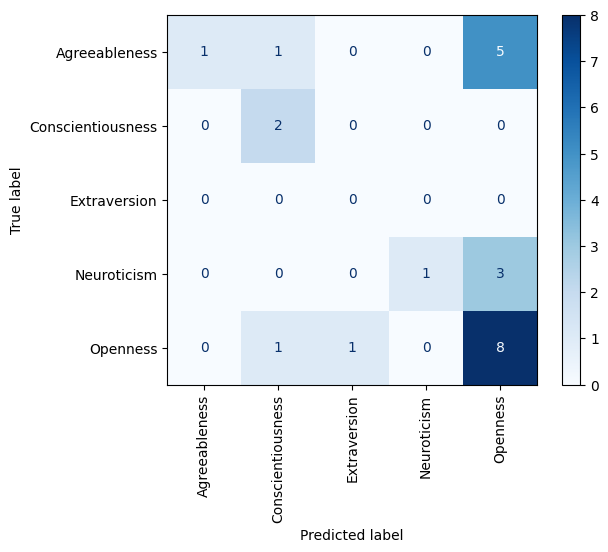

In [112]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(xticks_rotation="vertical", cmap="Blues")